Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'BNB'
against_currency = 'USD'

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2017-07-24,0.115203,0.115841,0.101531,0.105870,0.105870,1.452690e+05,BNB-USD
2017-07-25,0.105893,0.109013,0.099266,0.105138,0.105138,2.003950e+05,BNB-USD
2017-07-26,0.105108,0.108479,0.100888,0.107737,0.107737,3.444990e+05,BNB-USD
2017-07-27,0.107632,0.109019,0.101473,0.104067,0.104067,3.425680e+05,BNB-USD
2017-07-28,0.104782,0.111264,0.101108,0.107811,0.107811,3.402180e+05,BNB-USD
...,...,...,...,...,...,...,...
2021-06-30,303.527374,303.527374,281.579132,288.218414,288.218414,1.357795e+09,BNB-USD
2021-07-01,287.754456,290.621674,277.350311,287.423096,287.423096,1.133633e+09,BNB-USD
2021-07-02,287.215607,302.605865,283.434021,298.237122,298.237122,1.113777e+09,BNB-USD
2021-07-03,298.113556,314.713013,292.787384,307.732086,307.732086,1.387396e+09,BNB-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2017-07-24 to 2021-07-04
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1438 non-null   float64
 1   high      1438 non-null   float64
 2   low       1438 non-null   float64
 3   close     1438 non-null   float64
 4   adjclose  1438 non-null   float64
 5   volume    1438 non-null   float64
 6   ticker    1442 non-null   object 
 7   spread    1438 non-null   float64
dtypes: float64(7), object(1)
memory usage: 101.4+ KB


## Plot the closing value of binance over time

Text(0.5, 1.0, 'Closing price distribution of BNB')

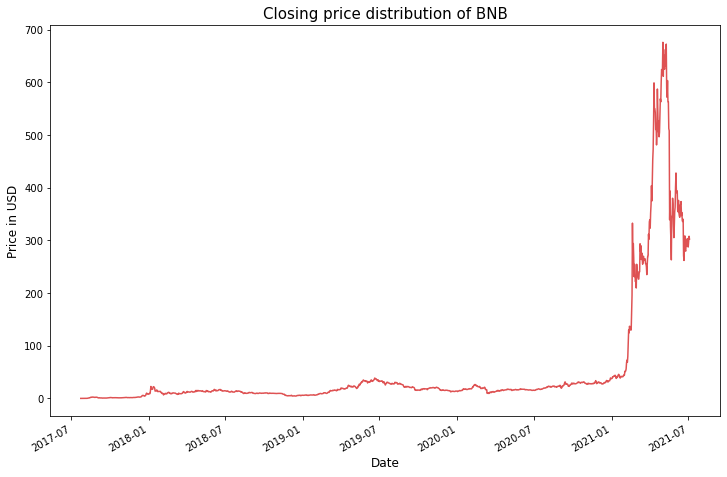

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BNB", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of BNB')

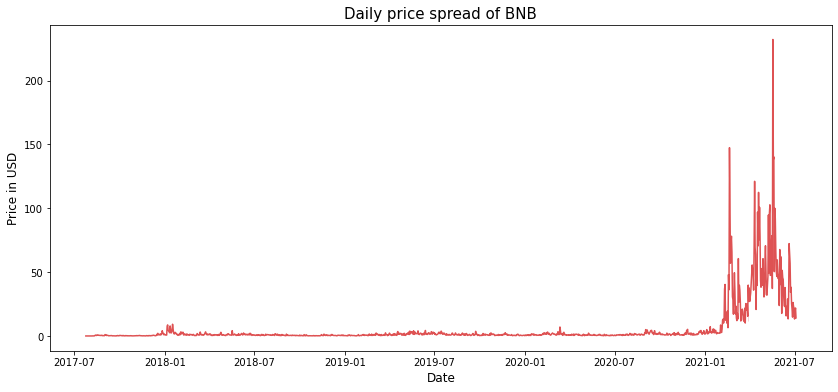

In [5]:
fig, ax = plt.subplots(figsize=(14,6))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of BNB", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2017-07-24,0.115203,0.115841,0.101531,0.105870,0.105870,1.452690e+05,BNB-USD
2017-07-25,0.105893,0.109013,0.099266,0.105138,0.105138,2.003950e+05,BNB-USD
2017-07-26,0.105108,0.108479,0.100888,0.107737,0.107737,3.444990e+05,BNB-USD
2017-07-27,0.107632,0.109019,0.101473,0.104067,0.104067,3.425680e+05,BNB-USD
2017-07-28,0.104782,0.111264,0.101108,0.107811,0.107811,3.402180e+05,BNB-USD
...,...,...,...,...,...,...,...
2021-06-30,303.527374,303.527374,281.579132,288.218414,288.218414,1.357795e+09,BNB-USD
2021-07-01,287.754456,290.621674,277.350311,287.423096,287.423096,1.133633e+09,BNB-USD
2021-07-02,287.215607,302.605865,283.434021,298.237122,298.237122,1.113777e+09,BNB-USD
2021-07-03,298.113556,314.713013,292.787384,307.732086,307.732086,1.387396e+09,BNB-USD


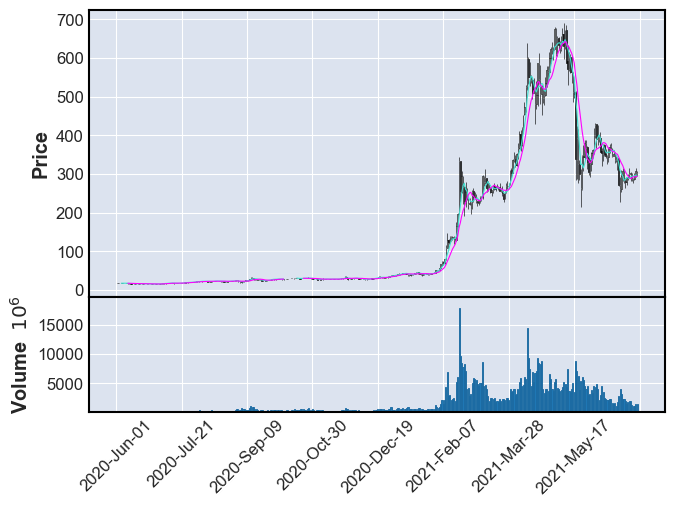

In [7]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2017-07-24,0.105870
1,2017-07-25,0.105138
2,2017-07-26,0.107737
3,2017-07-27,0.104067
4,2017-07-28,0.107811
...,...,...
1437,2021-06-30,288.218414
1438,2021-07-01,287.423096
1439,2021-07-02,298.237122
1440,2021-07-03,307.732086


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1463,2021-07-30,185.323634,150.827159,221.514079
1464,2021-07-31,183.135638,148.425456,218.721206
1465,2021-08-01,181.414356,143.418747,218.707053
1466,2021-08-02,179.771292,145.211268,217.093070
1467,2021-08-03,177.031832,142.572941,214.036892


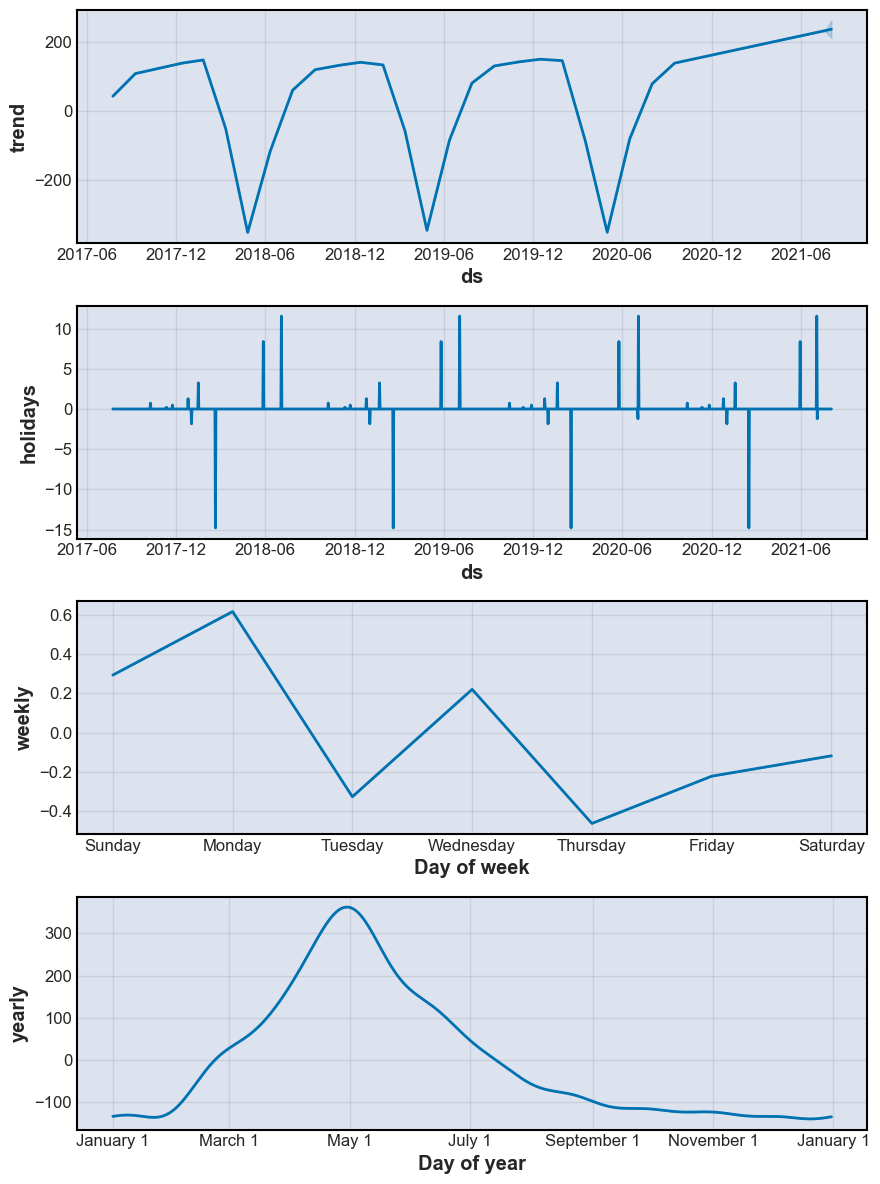

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

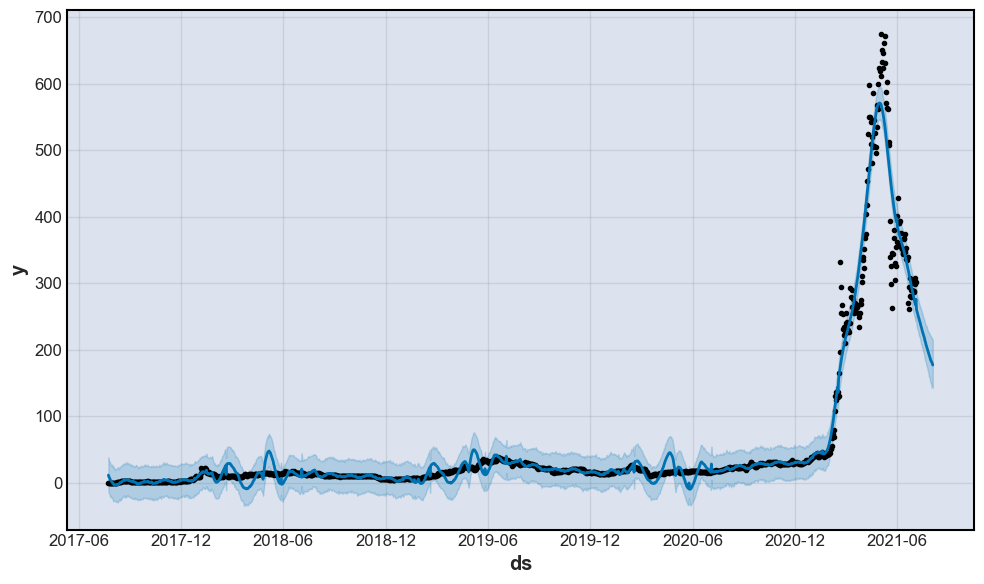

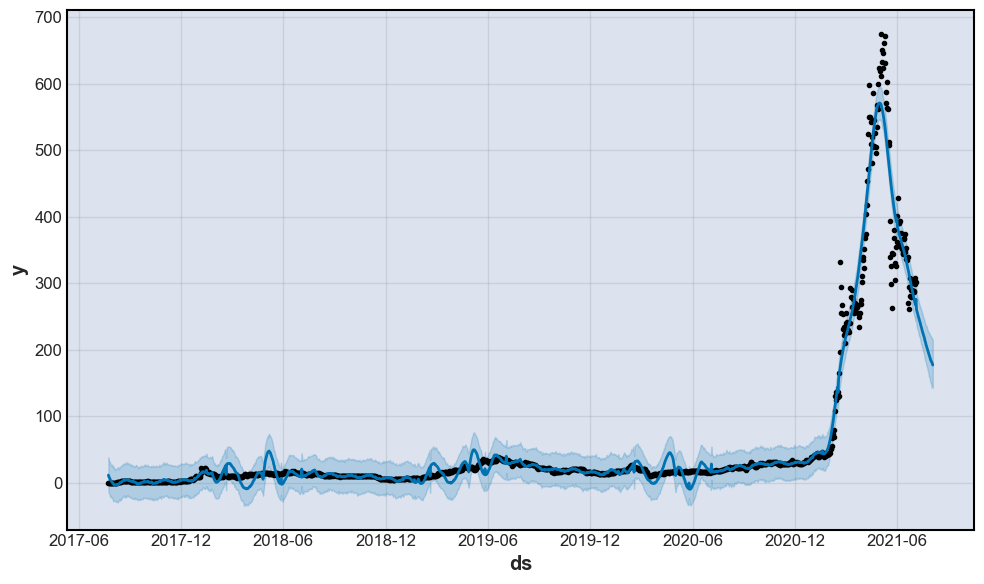

In [11]:
m.plot(forecast)